In [1]:
import os

def read_data(file):
    with open(file) as f:
        data = f.readlines()
    return data

datafile = r'C:\Users\chaochaoyan\Documents\retrosynthesis\reaction_prediction_seq2seq\processed_data'


In [20]:

targets = read_data(os.path.join(datafile, 'train_targets'))
sources = read_data(os.path.join(datafile, 'train_sources'))

assert len(sources) == len(targets)
reactions = dict()
for s,t in zip(sources, targets):
    items = s.split()
    key = items[0]
    if key not in reactions:
        reactions[key] = [[], []]
    reactions[key][0].append(''.join(items[1:]))
    reactions[key][1].append(t.strip().replace(' ', ''))

print(reactions['<RX_1>'][0][:10])
print(reactions['<RX_1>'][1][:10])

for k, v in reactions.items():
    print(k, len(v[0]))

['O=C1CC[C@H](CN2CCN(CCOc3cc4ncnc(Nc5ccc(F)c(Cl)c5)c4cc3OC3CCCC3)CC2)O1', 'Fc1cc2c(NC3CCCCCC3)ncnc2cn1', 'C[C@H](NC(=O)c1cc(Cl)cnc1Oc1cccc(F)c1)c1ccc(C(=O)OC(C)(C)C)cc1', 'c1ccc(Cn2ccc3ccccc32)cc1', 'CCS(=O)(=O)c1ccc(Cl)cc1CNC(=O)c1cc(Cl)c(CN2CCOC3(C2)CN(C(c2ccccc2)c2ccccc2)C3)c(C(F)(F)F)c1', 'NCCNc1ccnc2c1CC1(CN3CCC1CC3)O2', 'COC(=O)c1ccc(Nc2ccccc2)cc1', 'CC(=O)N1CCN(c2ccc([N+](=O)[O-])c(C)c2)CC1', 'COC(=O)c1cc(F)c(F)cc1Br', 'CC(C)(C)SCc1cc(NC(=O)C(C)(C)C)ccc1Cn1cc(CC#N)cn1']
['CS(=O)(=O)OC[C@H]1CCC(=O)O1.Fc1ccc(Nc2ncnc3cc(OCCN4CCNCC4)c(OC4CCCC4)cc23)cc1Cl', 'Fc1cc2c(Cl)ncnc2cn1.NC1CCCCCC1', 'C[C@H](NC(=O)c1cc(Cl)cnc1Cl)c1ccc(C(=O)OC(C)(C)C)cc1.Oc1cccc(F)c1', 'ClCc1ccccc1.c1ccc2[nH]ccc2c1', 'CCS(=O)(=O)c1ccc(Cl)cc1CNC(=O)c1cc(Cl)c(CBr)c(C(F)(F)F)c1.c1ccc(C(c2ccccc2)N2CC3(CNCCO3)C2)cc1', 'Clc1ccnc2c1CC1(CN3CCC1CC3)O2.NCCN', 'COC(=O)c1ccc(Br)cc1.Nc1ccccc1', 'CC(=O)N1CCNCC1.Cc1cc(F)ccc1[N+](=O)[O-]', 'C=[N+]=[N-].O=C(O)c1cc(F)c(F)cc1Br', 'CC(C)(C)SCc1cc(NC(=O)C(C)(C)C)ccc1CBr.N#CCc1cn[nH

In [38]:
import re

pattern = "(\[[^\]]+]|Br?|Cl?|N|O|S|P|F|I|b|c|n|o|s|p|\(|\)|\.|=|#|-|\+|\\\\|\/|:|~|@|\?|>|\*|\$|\%[0-9]{2}|[0-9])"
def smi_tokenizer(smi, regex=re.compile(pattern)):
    tokens = [token for token in regex.findall(smi)]
    assert smi == ''.join(tokens), 'smi:' + smi + '--tokens:' + ''.join(tokens)
    return tokens

elements = {'[Pd]','[nH]', '[Zn]', '[Si]', '[Br-]', '[OH-]', '[C@]', '[N+]', '[n+]', '[Zn+]', '[I+]', '[Cl-]',
            '[PH4]', '[K]', '[SH]', '[NH3+]', '[Sn]', '[NH2+]', 'Cl', '[PH2]', '[O-]', 'n', '[SiH]', '[N@+]',
            'o', 's', '[Mg]', 'O', '[N-]', '[SiH2]', 'B', '[Cu]', '[Pt]', 'c', '[n-]', '[BH3-]',
            '[C@H]', '[Li]', '[BH-]', 'I', '[S+]', 'S', '[C-]', '[SnH]', '[NH4+]', '[P+]', '[Fe]', '[Se]',
            'C','[C@@H]', 'P', '[S-]', '[se]', '[s+]', '[PH]', '[NH-]', '[B-]', 'N', 'Br',
            '[Mg+]', '[S@]', '[NH+]', '[Cl+3]', '[S@@]', 'F', '[C@@]'}

for s,t in zip(sources, targets):
    items = s.split()
    key = items[0]
    source = ''.join(items[1:])
    target = t.strip().replace(' ', '')
    
    source = set(smi_tokenizer(source)) & elements
    target = set(smi_tokenizer(target)) & elements
    
    print('-----------------------------')
    print(target)
    print(source)
    print(source & target)



-----------------------------
{'S', 'Cl', 'O', 'c', 'n', '[C@H]', 'F', 'C', 'N'}
{'Cl', 'O', 'c', 'n', '[C@H]', 'F', 'C', 'N'}
{'Cl', 'O', 'c', 'n', '[C@H]', 'F', 'C', 'N'}
-----------------------------
{'s', 'O', 'c', '[nH]', 'n', 'C', 'N'}
{'s', 'O', 'c', '[nH]', 'n', 'C', 'N'}
{'s', 'O', 'c', '[nH]', 'n', 'C', 'N'}
-----------------------------
{'O', 'c', 'n', 'B', 'F', 'C', 'N', 'Br'}
{'O', 'c', 'n', 'B', 'F', 'C', 'N'}
{'O', 'c', 'n', 'B', 'F', 'C', 'N'}
-----------------------------
{'C', 'N', 'O', 'c'}
{'C', 'N', 'O'}
{'C', 'N', 'O'}
-----------------------------
{'Cl', 'c', 'n', 'F', 'C', 'N'}
{'c', 'n', 'F', 'C', 'N'}
{'c', 'n', 'F', 'C', 'N'}
-----------------------------
{'S', 'Cl', 'O', 'c', '[N+]', '[O-]', 'B', 'C', 'N'}
{'S', 'O', 'c', '[N+]', '[O-]', 'B', 'C', 'N'}
{'S', 'O', 'c', '[N+]', '[O-]', 'B', 'C', 'N'}
-----------------------------
{'S', 'Cl', 'O', 'c', 'F', 'C', 'N', 'Br'}
{'S', 'Cl', 'O', 'c', 'F', 'C', 'N', 'Br'}
{'S', 'Cl', 'O', 'c', 'F', 'C', 'N', 'Br'}
---

-----------------------------
{'O', 'c', '[N+]', '[O-]', 'F', 'C', 'N'}
{'O', 'c', 'F', 'C', 'N'}
{'O', 'c', 'F', 'C', 'N'}
-----------------------------
{'O', 'c', 'n', 'C', 'N'}
{'O', 'c', 'n', 'C', 'N'}
{'O', 'c', 'n', 'C', 'N'}
-----------------------------
{'O', 'c', 'n', 'C', 'N'}
{'C', 'n', 'c'}
{'C', 'n', 'c'}
-----------------------------
{'C', 'O', 'P', 'c'}
{'C', 'O', 'c'}
{'C', 'O', 'c'}
-----------------------------
{'C', 'N', 'c', 'I'}
{'C', 'N', 'c'}
{'C', 'N', 'c'}
-----------------------------
{'S', 'O', 'c', 'C', 'N'}
{'S', 'O', 'c', 'C', 'N'}
{'S', 'O', 'c', 'C', 'N'}
-----------------------------
{'C', 'O', 'c'}
{'C', 'O', 'c'}
{'C', 'O', 'c'}
-----------------------------
{'S', 'O', 'c', 'n', 'F', 'C', 'N'}
{'S', 'O', 'c', '[nH]', 'n', 'F', 'C', 'N'}
{'S', 'O', 'c', 'n', 'F', 'C', 'N'}
-----------------------------
{'O', 'c', '[N+]', '[O-]', 'n', 'F', 'C', 'N'}
{'O', 'c', '[N+]', '[O-]', 'n', 'C', 'N'}
{'O', 'c', '[N+]', '[O-]', 'n', 'C', 'N'}
---------------------

-----------------------------
{'S', 'O', 'c', '[C@H]', 'C', 'N'}
{'S', 'O', 'c', '[C@H]', 'C', 'N'}
{'S', 'O', 'c', '[C@H]', 'C', 'N'}
-----------------------------
{'Cl', 'O', 'c', 'F', 'C', 'N'}
{'Cl', 'O', 'c', 'F', 'C', 'N'}
{'Cl', 'O', 'c', 'F', 'C', 'N'}
-----------------------------
{'Cl', 'O', 'c', '[nH]', 'n', 'F', 'C', 'N'}
{'O', 'c', '[nH]', 'n', 'F', 'C', 'N'}
{'O', 'c', '[nH]', 'n', 'F', 'C', 'N'}
-----------------------------
{'C', 'N', 'O', 'c'}
{'C', 'N', 'O', 'c'}
{'C', 'N', 'O', 'c'}
-----------------------------
{'O', 'c', 'n', 'B', 'C', 'Br'}
{'C', 'O', 'n', 'c'}
{'C', 'O', 'n', 'c'}
-----------------------------
{'C', 'N', 'O', 'c'}
{'C', 'N', 'O'}
{'C', 'N', 'O'}
-----------------------------
{'C', 'I', 'O', 'c'}
{'C', 'I', 'O', 'c'}
{'C', 'c', 'O', 'I'}
-----------------------------
{'Cl', 'O', 'c', '[N+]', '[O-]', 'n', 'F', 'C', 'N'}
{'O', 'c', '[N+]', '[O-]', 'n', 'F', 'C', 'N'}
{'O', 'c', '[N+]', '[O-]', 'n', 'F', 'C', 'N'}
-----------------------------
{'O', 

-----------------------------
{'O', 'c', 'n', 'F', 'C'}
{'O', 'c', 'n', 'F', 'C'}
{'O', 'c', 'n', 'F', 'C'}
-----------------------------
{'S', 's', 'Cl', 'O', 'c', 'n', 'F', 'C', 'N'}
{'S', 's', 'Cl', 'O', 'c', 'n', 'F', 'C', 'N'}
{'S', 's', 'Cl', 'O', 'c', 'n', 'F', 'C', 'N'}
-----------------------------
{'C', 'N', 'O', 'c'}
{'C', 'N', 'O', 'c'}
{'C', 'N', 'O', 'c'}
-----------------------------
{'O', 'c', 'C', 'N', 'Br'}
{'O', 'c', '[C@H]', 'C', 'N'}
{'C', 'N', 'O', 'c'}
-----------------------------
{'Cl', 'O', 'c', 'n', 'F', 'C'}
{'O', 'c', 'n', 'F', 'C'}
{'O', 'c', 'n', 'F', 'C'}
-----------------------------
{'O', 'c', 'B', 'F', 'C', 'N', 'Br'}
{'O', 'c', 'F', 'C', 'N'}
{'O', 'c', 'F', 'C', 'N'}
-----------------------------
{'o', 'O', 'c', 'C', 'N', '[C@@H]', 'Br'}
{'o', 'O', 'c', 'C', 'N', '[C@@H]', 'Br'}
{'o', 'O', 'c', 'C', 'N', '[C@@H]', 'Br'}
-----------------------------
{'S', 'Cl', 'O', 'c', 'n', 'C', 'N', 'Br'}
{'S', 'O', 'c', 'n', 'C', 'N', 'Br'}
{'S', 'O', 'c', 'n', 

{'C', 'N', 'O', 'c'}
{'C', 'N', 'O', 'c'}
-----------------------------
{'o', 'O', 'c', 'n', 'C', 'N'}
{'o', 'O', 'c', 'n', 'C', 'N'}
{'o', 'O', 'c', 'n', 'C', 'N'}
-----------------------------
{'C', 'O'}
{'C', 'O', '[C@@H]', '[C@H]'}
{'C', 'O'}
-----------------------------
{'Cl', 'O', 'c', 'n', 'B', 'C'}
{'C', 'O', 'n', 'c'}
{'C', 'O', 'n', 'c'}
-----------------------------
{'O', 'c', '[C@H]', 'F', 'C', 'N', '[C@@H]', 'Br'}
{'O', 'c', '[C@H]', 'F', 'C', 'N', '[C@@H]', 'Br'}
{'O', 'c', '[C@H]', 'F', 'C', 'N', '[C@@H]', 'Br'}
-----------------------------
{'s', 'O', 'c', 'B', 'C', 'Br'}
{'C', 'O', 's', 'c'}
{'C', 'O', 's', 'c'}
-----------------------------
{'O', 'c', 'F', 'C', 'N'}
{'O', 'c', 'F', 'C', 'N'}
{'O', 'c', 'F', 'C', 'N'}
-----------------------------
{'Cl', 'c', 'n', 'F', 'C', 'N'}
{'c', 'n', 'F', 'C', 'N'}
{'c', 'n', 'F', 'C', 'N'}
-----------------------------
{'Cl', 'O', 'c', 'n', 'F', 'C', 'N'}
{'O', 'c', 'n', 'F', 'C', 'N'}
{'O', 'c', 'n', 'F', 'C', 'N'}
-----------

{'C', 'N', 'n', 'c'}
{'C', 'N', 'n', 'c'}
-----------------------------
{'O', 'c', 'n', 'F', 'C', 'N'}
{'C', 'O', 'F'}
{'C', 'O', 'F'}
-----------------------------
{'C', 'O', 'P', 'c'}
{'C', 'O', 'c'}
{'C', 'O', 'c'}
-----------------------------
{'Cl', 'O', 'c', '[nH]', 'n', 'C', 'N'}
{'O', 'c', '[nH]', 'n', 'C', 'N'}
{'O', 'c', '[nH]', 'n', 'C', 'N'}
-----------------------------
{'S', 'Cl', 'O', 'c', 'n', 'C', 'N'}
{'S', 'Cl', 'O', 'c', 'n', 'C', 'N'}
{'S', 'Cl', 'O', 'c', 'n', 'C', 'N'}
-----------------------------
{'o', 'O', 'c', 'n', 'C', 'I', 'Br'}
{'o', 'O', 'c', 'n', 'C', 'Br'}
{'o', 'O', 'c', 'n', 'C', 'Br'}
-----------------------------
{'o', 'Cl', 'O', 'c', 'n', 'C', 'N'}
{'o', 'Cl', 'O', 'c', 'n', 'C', 'N'}
{'o', 'Cl', 'O', 'c', 'n', 'C', 'N'}
-----------------------------
{'S', 'Cl', 'O', 'C', 'N', '[C@@H]'}
{'S', 'O', 'C', 'N', '[C@@H]'}
{'S', 'O', 'C', 'N', '[C@@H]'}
-----------------------------
{'Cl', 'O', 'c', '[nH]', 'n', 'C', 'N'}
{'Cl', 'O', 'c', '[nH]', 'n', 'C

-----------------------------
{'s', 'Cl', 'O', 'c', 'n', 'F', 'C', 'N'}
{'s', 'O', 'c', 'n', 'F', 'C', 'N'}
{'s', 'O', 'c', 'n', 'F', 'C', 'N'}
-----------------------------
{'C', 'O', 'n', 'c'}
{'C', 'O', 'n', 'c'}
{'C', 'O', 'n', 'c'}
-----------------------------
{'O', 'c', 'n', 'C', 'N'}
{'O', 'c', 'n', 'C', 'N'}
{'O', 'c', 'n', 'C', 'N'}
-----------------------------
{'O', 'c', '[N+]', '[nH]', '[O-]', 'n', 'F'}
{'O', 'c', '[nH]', 'n', 'F', 'N'}
{'O', 'c', '[nH]', 'n', 'F'}
-----------------------------
{'o', 'Cl', 'O', 'c', 'n', 'F', 'C', 'N'}
{'o', 'O', 'c', 'n', 'F', 'C', 'N'}
{'o', 'O', 'c', 'n', 'F', 'C', 'N'}
-----------------------------
{'O', 'c', '[nH]', 'C', 'N'}
{'O', 'c', '[nH]', 'C', 'N'}
{'O', 'c', '[nH]', 'C', 'N'}
-----------------------------
{'C', 'N', 'O', 'c'}
{'C', 'N', 'O', 'c'}
{'C', 'N', 'O', 'c'}
-----------------------------
{'Cl', 'O', 'c', 'B', 'F', 'C', 'Br'}
{'Cl', 'O', 'c', 'F', 'C'}
{'Cl', 'O', 'c', 'F', 'C'}
-----------------------------
{'O', 'c', 

-----------------------------
{'S', 's', 'Cl', 'O', 'c', '[nH]', 'n', 'C'}
{'S', 's', 'O', 'c', 'n', 'C'}
{'S', 's', 'O', 'c', 'n', 'C'}
-----------------------------
{'C', 'N', 'O', 'c'}
{'C', 'N', 'O', 'c'}
{'C', 'N', 'O', 'c'}
-----------------------------
{'O', 'c', 'n', 'F', 'C'}
{'O', 'c', 'n', 'F', 'C'}
{'O', 'c', 'n', 'F', 'C'}
-----------------------------
{'O', 'c', '[nH]', 'C', 'N', '[C@@H]'}
{'O', 'c', '[nH]', 'C', 'N', '[C@@H]'}
{'O', 'c', '[nH]', 'C', 'N', '[C@@H]'}
-----------------------------
{'C', 'N', 'O', 'c'}
{'C', 'N', 'O', 'c'}
{'C', 'N', 'O', 'c'}
-----------------------------
{'Cl', 'O', 'c', 'F', 'C', 'N'}
{'Cl', 'O', 'c', 'F', 'C', 'N'}
{'Cl', 'O', 'c', 'F', 'C', 'N'}
-----------------------------
{'O', 'c', 'n', '[Si]', 'C', 'N'}
{'O', 'c', 'n', '[Si]', 'C', 'N'}
{'O', 'c', 'n', '[Si]', 'C', 'N'}
-----------------------------
{'S', 'O', 'c', 'n', 'F', 'C', 'N', 'Br'}
{'S', 'O', 'c', 'n', 'F', 'C', 'N'}
{'S', 'O', 'c', 'n', 'F', 'C', 'N'}
--------------------

{'o', 'O', 'c', 'C'}
-----------------------------
{'O', 'c', 'C', 'N', '[C@@H]'}
{'O', 'c', '[C@H]', 'C', 'N', '[C@@H]'}
{'O', 'c', 'C', 'N', '[C@@H]'}
-----------------------------
{'Cl', 'O', 'c', 'n', 'F', 'C', 'N'}
{'O', 'c', 'n', 'F', 'C', 'N'}
{'O', 'c', 'n', 'F', 'C', 'N'}
-----------------------------
{'Cl', 'O', 'c', 'n', 'F', 'C', 'Br'}
{'Cl', 'O', 'c', 'n', 'F', 'C'}
{'Cl', 'O', 'c', 'n', 'F', 'C'}
-----------------------------
{'S', 'O', 'c', 'n', 'C', 'N'}
{'S', 'O', 'c', 'C', 'N'}
{'S', 'O', 'c', 'C', 'N'}
-----------------------------
{'O', 'c', '[nH]', 'n', 'C', 'N'}
{'O', 'c', '[nH]', 'n', 'C', 'N'}
{'O', 'c', '[nH]', 'n', 'C', 'N'}
-----------------------------
{'O', 'c', '[C@H]', 'C', 'N'}
{'O', 'c', 'C', 'N', '[C@@H]'}
{'C', 'N', 'O', 'c'}
-----------------------------
{'O', 'c', '[nH]', 'n', 'B', 'C', 'N', 'Br'}
{'O', 'c', '[nH]', 'n', 'C', 'N'}
{'O', 'c', '[nH]', 'n', 'C', 'N'}
-----------------------------
{'O', 'c', '[nH]', 'C', 'N'}
{'O', 'c', '[nH]', 'C', 'N'

-----------------------------
{'Cl', 'O', 'c', 'F', 'C', 'N'}
{'Cl', 'O', 'c', 'F', 'C', 'N'}
{'Cl', 'O', 'c', 'F', 'C', 'N'}
-----------------------------
{'Cl', 'O', 'c', 'C', 'N'}
{'Cl', 'O', 'c', 'C', 'N'}
{'Cl', 'O', 'c', 'C', 'N'}
-----------------------------
{'o', 's', 'O', 'c', '[O-]', 'n', '[Si]', 'C', 'Br'}
{'o', 's', 'O', 'c', 'n', '[Si]', 'C'}
{'o', 's', 'O', 'c', 'n', '[Si]', 'C'}
-----------------------------
{'S', 'Cl', 'O', 'c', 'C', 'N'}
{'S', 'Cl', 'O', 'c', 'C', 'N', '[C@@]'}
{'S', 'Cl', 'O', 'c', 'C', 'N'}
-----------------------------
{'O', 'c', '[nH]', 'n', 'C', 'N'}
{'O', 'c', '[nH]', 'n', 'C', 'N'}
{'O', 'c', '[nH]', 'n', 'C', 'N'}
-----------------------------
{'C', 'O', 'c', 'Br'}
{'C', 'O', 'c'}
{'C', 'O', 'c'}
-----------------------------
{'Cl', 'O', 'c', 'C', 'N'}
{'C', 'N', 'O', 'c'}
{'C', 'N', 'O', 'c'}
-----------------------------
{'S', 'c', 'C', 'N', 'I'}
{'S', 'c', 'C', 'N', 'I'}
{'S', 'c', 'C', 'N', 'I'}
-----------------------------
{'C', 'N', 'O'

{'s', 'O', 'c', 'C', 'N'}
-----------------------------
{'Cl', 'O', 'c', 'n', 'C', 'N'}
{'O', 'c', 'n', 'C', 'N'}
{'O', 'c', 'n', 'C', 'N'}
-----------------------------
{'S', 'O', 'c', 'F', 'C', 'N'}
{'S', 'O', 'c', 'F', 'C', 'N'}
{'S', 'O', 'c', 'F', 'C', 'N'}
-----------------------------
{'O', 'c', 'n', 'C', 'N', 'Br'}
{'O', 'c', 'n', 'N', 'Br'}
{'O', 'c', 'n', 'N', 'Br'}
-----------------------------
{'O', 'c', 'F', 'C', 'N'}
{'O', 'c', 'F', 'C', 'N'}
{'O', 'c', 'F', 'C', 'N'}
-----------------------------
{'O', 'c', 'n', '[C@H]', 'C'}
{'O', 'c', 'n', '[C@H]', 'C'}
{'O', 'c', 'n', '[C@H]', 'C'}
-----------------------------
{'O', 'c', 'n', 'C', 'N', 'I'}
{'O', 'c', 'n', 'C', 'N', 'I'}
{'O', 'c', 'n', 'C', 'N', 'I'}
-----------------------------
{'S', 'Cl', 'O', 'c', 'n', 'C', 'N'}
{'S', 'Cl', 'O', 'c', 'n', 'C', 'N'}
{'S', 'Cl', 'O', 'c', 'n', 'C', 'N'}
-----------------------------
{'O', 'c', '[nH]', 'F', 'C', 'N'}
{'O', 'c', 'n', 'F', 'C', 'N'}
{'O', 'c', 'F', 'C', 'N'}
--------

{'O', 'n', 'c', 'F'}
-----------------------------
{'s', 'O', 'c', 'n', '[C@H]', 'C', 'N'}
{'s', 'O', 'c', 'n', 'C', 'N'}
{'s', 'O', 'c', 'n', 'C', 'N'}
-----------------------------
{'[Sn]', 'O', 'c', 'n', 'C', 'N', 'Br'}
{'O', 'c', 'n', 'C', 'N'}
{'O', 'c', 'n', 'C', 'N'}
-----------------------------
{'o', 'O', 'c', 'n', '[C@H]', 'F', 'C', 'N', '[C@@H]'}
{'o', 'O', 'c', 'n', '[C@H]', 'F', 'C', 'N', '[C@@H]'}
{'o', 'O', 'c', 'n', '[C@H]', 'F', 'C', 'N', '[C@@H]'}
-----------------------------
{'s', 'O', 'c', 'n', 'B', 'C', 'N', '[C@@H]', 'Br'}
{'s', 'O', 'c', 'n', 'C', 'N', '[C@@H]'}
{'s', 'O', 'c', 'n', 'C', 'N', '[C@@H]'}
-----------------------------
{'s', 'O', 'c', 'C', 'N'}
{'s', 'O', 'c', 'C', 'N'}
{'s', 'O', 'c', 'C', 'N'}
-----------------------------
{'c', 'n', 'C', 'N', 'Br'}
{'C', 'N', 'n', 'c'}
{'C', 'N', 'n', 'c'}
-----------------------------
{'O', 'c', '[nH]', 'n', 'C', 'N'}
{'O', 'c', '[nH]', 'n', 'C', 'N'}
{'O', 'c', '[nH]', 'n', 'C', 'N'}
---------------------------

{'S', 'O', 'c', 'n', 'C', 'N', '[C@@H]'}
{'S', 'O', 'c', 'n', 'C', 'N', '[C@@H]'}
-----------------------------
{'O', 'c', 'B', 'C', 'N', 'I'}
{'O', 'c', 'B', 'C', 'N'}
{'O', 'c', 'B', 'C', 'N'}
-----------------------------
{'Cl', 'O', 'c', '[nH]', 'n', 'C'}
{'C', 'O', 'n', 'c'}
{'C', 'O', 'n', 'c'}
-----------------------------
{'C', 'O', 'c'}
{'C', 'O', 'c'}
{'C', 'O', 'c'}
-----------------------------
{'Cl', 'O', 'c', 'n', 'B', 'C'}
{'Cl', 'O', 'c', 'n', 'C'}
{'Cl', 'O', 'c', 'n', 'C'}
-----------------------------
{'O', 'c', 'n', 'C', 'N'}
{'O', 'c', 'n', 'C', 'N'}
{'O', 'c', 'n', 'C', 'N'}
-----------------------------
{'O', '[C@H]', 'C', '[C@@H]', '[C@@]'}
{'O', '[C@H]', 'C', '[C@@H]', '[C@@]'}
{'O', '[C@H]', 'C', '[C@@H]', '[C@@]'}
-----------------------------
{'O', 'c', '[N+]', '[O-]', 'F', 'C', 'N'}
{'O', 'c', '[N+]', '[O-]', 'F', 'C', 'N'}
{'O', 'c', '[N+]', '[O-]', 'F', 'C', 'N'}
-----------------------------
{'s', 'Cl', 'O', 'c', 'n', '[Si]', 'C', 'N'}
{'s', 'Cl', 'O', '

-----------------------------
{'O', 'c', 'n', '[C@H]', 'C', 'N'}
{'O', 'c', 'n', '[C@H]', 'C', 'N'}
{'O', 'c', 'n', '[C@H]', 'C', 'N'}
-----------------------------
{'O', 'c', '[Si]', '[C@H]', 'C', 'N', '[C@@H]'}
{'O', 'c', '[Si]', '[C@H]', 'C', 'N', '[C@@H]'}
{'O', 'c', '[Si]', '[C@H]', 'C', 'N', '[C@@H]'}
-----------------------------
{'S', 'O', 'c', 'n', '[C@H]', 'F', 'C', 'N'}
{'S', 'O', 'c', 'n', '[C@H]', 'F', 'C', 'N'}
{'S', 'O', 'c', 'n', '[C@H]', 'F', 'C', 'N'}
-----------------------------
{'Cl', 'O', 'c', 'n', 'C', 'N'}
{'O', 'c', 'n', 'C', 'N'}
{'O', 'c', 'n', 'C', 'N'}
-----------------------------
{'[C@]', 'O', 'c', '[C@H]', 'C', 'N', '[C@@H]', 'Br', '[C@@]'}
{'O', 'c', 'C', 'N', '[C@@H]', '[C@@]'}
{'O', 'c', 'C', 'N', '[C@@H]', '[C@@]'}
-----------------------------
{'O', 'c', 'n', 'F', 'C', 'N', 'Br'}
{'O', 'c', 'n', 'F', 'C', 'N'}
{'O', 'c', 'n', 'F', 'C', 'N'}
-----------------------------
{'P', 'O', 'c', 'n', 'F', 'C', 'N'}
{'P', 'O', 'c', 'n', 'F', 'C', 'N'}
{'P', 'O

-----------------------------
{'O', 'c', '[nH]', 'n', 'C'}
{'C', 'n', 'c'}
{'C', 'n', 'c'}
-----------------------------
{'O', 'c', 'n', 'C', 'N', 'Br'}
{'O', 'c', 'n', 'C', 'N'}
{'O', 'c', 'n', 'C', 'N'}
-----------------------------
{'Cl', 'O', 'c', '[N+]', '[O-]', 'F', 'C', 'N'}
{'Cl', 'O', 'c', 'F', 'C', 'N'}
{'Cl', 'O', 'c', 'F', 'C', 'N'}
-----------------------------
{'O', 'c', '[N+]', '[O-]', 'n', 'C', 'N'}
{'C', 'N', 'n', 'c'}
{'C', 'N', 'n', 'c'}
-----------------------------
{'Cl', 'O', 'c', 'n', '[C@H]', 'F', 'C', 'N', '[C@@H]', 'Br'}
{'Cl', 'O', 'c', 'n', '[C@H]', 'F', 'C', 'N', '[C@@H]'}
{'Cl', 'O', 'c', 'n', '[C@H]', 'F', 'C', 'N', '[C@@H]'}
-----------------------------
{'S', 'O', 'c', 'C', 'N', '[SH]'}
{'S', 'O', 'C', 'N', '[SH]'}
{'S', 'O', 'C', 'N', '[SH]'}
-----------------------------
{'Cl', 'O', 'c', '[N+]', '[O-]', 'C', 'N'}
{'Cl', 'O', 'c', 'C', 'N'}
{'Cl', 'O', 'c', 'C', 'N'}
-----------------------------
{'Cl', 'O', 'c', '[nH]', 'n', 'C'}
{'Cl', 'O', 'c', 'n',

{'O', '[C@H]', 'C', 'N', '[C@@H]'}
{'O', '[C@H]', 'C', 'N', '[C@@H]'}
{'O', '[C@H]', 'C', 'N', '[C@@H]'}
-----------------------------
{'O', 'c', 'n', '[C@H]', 'C', 'N'}
{'O', 'c', 'n', '[C@H]', 'C', 'N'}
{'O', 'c', 'n', '[C@H]', 'C', 'N'}
-----------------------------
{'S', 'O', 'c', '[nH]', 'n', '[C@H]', 'F', 'C', 'N'}
{'S', 'O', 'c', '[nH]', 'n', '[C@H]', 'C', 'N'}
{'S', 'O', 'c', '[nH]', 'n', '[C@H]', 'C', 'N'}
-----------------------------
{'Cl', 'O', 'c', 'n', 'F', 'C', 'N', '[C@@H]'}
{'Cl', 'O', 'c', 'n', '[C@H]', 'F', 'C', 'N'}
{'Cl', 'O', 'c', 'n', 'F', 'C', 'N'}
-----------------------------
{'Cl', 'O', 'c', 'n', 'C', 'N', 'Br'}
{'Cl', 'O', 'c', 'n', 'C', 'N', 'Br'}
{'Cl', 'O', 'c', 'n', 'C', 'N', 'Br'}
-----------------------------
{'o', 'S', 'O', 'c', 'C', 'N'}
{'o', 'S', 'c', 'C', 'N'}
{'o', 'S', 'c', 'C', 'N'}
-----------------------------
{'Cl', 'O', 'c', '[N+]', '[nH]', '[O-]', 'n', 'C', 'N'}
{'Cl', 'O', 'c', '[N+]', '[nH]', '[O-]', 'n', 'C', 'N'}
{'Cl', 'O', 'c', '[N+]

-----------------------------
{'Cl', 'O', 'c', 'n', 'C', 'N'}
{'Cl', 'O', 'c', 'n', 'C', 'N'}
{'Cl', 'O', 'c', 'n', 'C', 'N'}
-----------------------------
{'C', 'O', 'Cl'}
{'C', 'O'}
{'C', 'O'}
-----------------------------
{'O', 'c', 'F', 'C', 'N'}
{'O', 'c', 'F', 'C', 'N'}
{'O', 'c', 'F', 'C', 'N'}
-----------------------------
{'O', 'c', 'n', 'C', 'N', 'Br'}
{'O', 'c', 'n', 'C', 'N'}
{'O', 'c', 'n', 'C', 'N'}
-----------------------------
{'Cl', 'O', 'c', 'n', 'F', 'C', 'N'}
{'Cl', 'O', 'c', 'n', 'F', 'C', 'N'}
{'Cl', 'O', 'c', 'n', 'F', 'C', 'N'}
-----------------------------
{'O', 'c', 'n', 'F', 'C'}
{'O', 'c', 'n', 'F', 'C'}
{'O', 'c', 'n', 'F', 'C'}
-----------------------------
{'O', 'c', '[C@H]', 'C', 'N', '[C@@H]'}
{'O', 'c', '[C@H]', 'C', 'N', '[C@@H]'}
{'O', 'c', '[C@H]', 'C', 'N', '[C@@H]'}
-----------------------------
{'S', 'O', 'c', '[O-]', 'n', 'F', 'C', 'N', 'Br'}
{'S', 'O', 'c', 'n', 'F', 'C', 'N', 'Br'}
{'S', 'O', 'c', 'n', 'F', 'C', 'N', 'Br'}
--------------------

-----------------------------
{'Cl', 'O', 'c', '[N+]', '[O-]', 'n', 'C', 'N'}
{'O', 'c', '[N+]', '[O-]', 'n', 'C', 'N'}
{'O', 'c', '[N+]', '[O-]', 'n', 'C', 'N'}
-----------------------------
{'C', 'N', 'O', 'c'}
{'C', 'N', 'c'}
{'C', 'N', 'c'}
-----------------------------
{'S', 's', 'Cl', 'O', 'c', '[C@H]', 'C', 'N'}
{'S', 's', 'O', 'c', '[C@H]', 'C', 'N'}
{'S', 's', 'O', 'c', '[C@H]', 'C', 'N'}
-----------------------------
{'C', 'N', 'O', '[C@@H]'}
{'C', 'N', 'O', '[C@@H]'}
{'C', 'N', 'O', '[C@@H]'}
-----------------------------
{'Cl', 'O', 'c', '[N+]', '[O-]', 'F', 'C', 'N'}
{'O', 'c', '[N+]', '[O-]', 'F', 'C'}
{'O', 'c', '[N+]', '[O-]', 'F', 'C'}
-----------------------------
{'Cl', 'O', 'c', 'C', 'N', 'Br'}
{'Cl', 'O', 'c', 'C', 'N', 'Br'}
{'Cl', 'O', 'c', 'C', 'N', 'Br'}
-----------------------------
{'o', 'O', 'c', 'n', 'C', 'N'}
{'o', 'O', 'c', 'n', 'C', 'N'}
{'o', 'O', 'c', 'n', 'C', 'N'}
-----------------------------
{'Cl', 'O', 'c', '[N+]', '[O-]', 'n', 'C'}
{'Cl', 'O', 'c

{'O', 'c', 'n', 'C', 'N'}
-----------------------------
{'C', 'N', 'c', 'Cl'}
{'C', 'N', 'c', 'Cl'}
{'C', 'N', 'c', 'Cl'}
-----------------------------
{'Cl', 'O', 'c', 'n', 'F', 'C', 'N', 'Br'}
{'O', 'c', 'n', 'F', 'C', 'N', 'Br'}
{'O', 'c', 'n', 'F', 'C', 'N', 'Br'}
-----------------------------
{'Cl', 'O', 'c', 'n', 'C', 'N'}
{'Cl', 'O', 'c', 'n', 'C', 'N'}
{'Cl', 'O', 'c', 'n', 'C', 'N'}
-----------------------------
{'s', '[C-]', 'O', 'c', 'C', 'N'}
{'s', 'O', 'c', 'C', 'N'}
{'s', 'O', 'c', 'C', 'N'}
-----------------------------
{'S', 'Cl', 'O', 'c', 'n', 'C', 'N'}
{'S', 'O', 'c', 'n', 'C', 'N'}
{'S', 'O', 'c', 'n', 'C', 'N'}
-----------------------------
{'Cl', 'c', 'n', 'C', 'N'}
{'Cl', 'c', 'n', 'C', 'N'}
{'Cl', 'c', 'n', 'C', 'N'}
-----------------------------
{'S', 's', 'O', 'c', 'n', 'B', 'C', 'N', 'Br'}
{'S', 's', 'O', 'c', 'n', 'C', 'N'}
{'S', 's', 'O', 'c', 'n', 'C', 'N'}
-----------------------------
{'Cl', '[S-]', 'c', 'n', 'C', 'N'}
{'S', 'c', 'n', 'C', 'N'}
{'C', 'N'

{'Cl', 'O', 'c', 'n', 'F', 'C', 'N'}
-----------------------------
{'O', 'c', 'n', 'F', 'C', 'N'}
{'O', 'c', 'n', 'F', 'C', 'N'}
{'O', 'c', 'n', 'F', 'C', 'N'}
-----------------------------
{'C', 'O', 'n', 'c'}
{'C', 'O', 'n', 'c'}
{'C', 'O', 'n', 'c'}
-----------------------------
{'O', 'c', 'n', 'C', 'N'}
{'O', 'c', 'n', 'C', 'N'}
{'O', 'c', 'n', 'C', 'N'}
-----------------------------
{'Cl', 'O', 'c', 'n', 'C', 'N', 'Br'}
{'Cl', 'O', 'c', 'n', 'C', 'N'}
{'Cl', 'O', 'c', 'n', 'C', 'N'}
-----------------------------
{'S', 'O', 'c', '[C@H]', 'F', 'C', 'N', '[C@@]'}
{'S', 'O', 'c', '[C@H]', 'F', 'C', 'N', '[C@@]'}
{'S', 'O', 'c', '[C@H]', 'F', 'C', 'N', '[C@@]'}
-----------------------------
{'Cl', 'O', 'c', '[N+]', '[O-]', 'n', 'C'}
{'Cl', 'O', 'c', '[N+]', '[O-]', 'n', 'C'}
{'Cl', 'O', 'c', '[N+]', '[O-]', 'n', 'C'}
-----------------------------
{'s', 'O', 'c', 'n', 'B', 'C', 'N', 'I'}
{'s', 'O', 'c', 'n', 'C', 'N'}
{'s', 'O', 'c', 'n', 'C', 'N'}
-----------------------------
{'o', 'O

-----------------------------
{'Cl', 'O', 'c', 'n', '[C@H]', 'C', 'N'}
{'O', 'c', 'n', '[C@H]', 'C', 'N'}
{'O', 'c', 'n', '[C@H]', 'C', 'N'}
-----------------------------
{'S', 'Cl', 'O', 'C', 'N'}
{'C', 'S', 'O', 'N'}
{'C', 'S', 'O', 'N'}
-----------------------------
{'Cl', 'O', 'c', 'n', 'F', 'C', 'N'}
{'O', 'c', 'n', 'F', 'C', 'N'}
{'O', 'c', 'n', 'F', 'C', 'N'}
-----------------------------
{'C', 'O', 'c'}
{'C', 'O', 'c'}
{'C', 'O', 'c'}
-----------------------------
{'C', 'O', 'n', 'c'}
{'C', 'O', 'n', 'c'}
{'C', 'O', 'n', 'c'}
-----------------------------
{'Cl', 'O', 'c', 'n', 'B', 'F', 'C', 'N'}
{'O', 'c', 'n', 'F', 'C', 'N'}
{'O', 'c', 'n', 'F', 'C', 'N'}
-----------------------------
{'S', 'O', 'c', 'B', 'F', 'C', 'N', '[C@@H]', 'Br'}
{'S', 'O', 'c', 'F', 'C', 'N', '[C@@H]'}
{'S', 'O', 'c', 'F', 'C', 'N', '[C@@H]'}
-----------------------------
{'S', 'Cl', 'O', 'c', 'B', 'C', 'Br'}
{'S', 'Cl', 'O', 'c', 'C'}
{'S', 'Cl', 'O', 'c', 'C'}
-----------------------------
{'O', 'c',

{'C', 'N', 'O', 'c'}
-----------------------------
{'Cl', 'O', 'c', 'n', 'F', 'C'}
{'O', 'c', 'n', 'F', 'C'}
{'O', 'c', 'n', 'F', 'C'}
-----------------------------
{'c', '[nH]', 'n', '[Si]', 'C'}
{'C', 'n', 'c', '[nH]'}
{'C', 'n', 'c', '[nH]'}
-----------------------------
{'C', 'N', 'O', 'c'}
{'O', 'c', 'n', 'C', 'N'}
{'C', 'N', 'O', 'c'}
-----------------------------
{'O', 'c', 'n', 'C', 'I'}
{'C', 'O', 'n', 'c'}
{'C', 'O', 'n', 'c'}
-----------------------------
{'Cl', 'c', '[nH]', 'n', 'C', 'N'}
{'c', '[nH]', 'n', 'C', 'N'}
{'c', '[nH]', 'n', 'C', 'N'}
-----------------------------
{'O', 'c', '[N+]', '[O-]', 'n', 'F', 'C', 'N'}
{'O', 'c', 'n', 'F', 'C', 'N'}
{'O', 'c', 'n', 'F', 'C', 'N'}
-----------------------------
{'s', 'Cl', 'O', 'c', 'n', 'C', 'N'}
{'s', 'Cl', 'O', 'c', 'n', 'C', 'N'}
{'s', 'Cl', 'O', 'c', 'n', 'C', 'N'}
-----------------------------
{'O', 'c', 'F', 'C', 'N'}
{'O', 'c', 'F', 'C', 'N'}
{'O', 'c', 'F', 'C', 'N'}
-----------------------------
{'o', 'O', 'c', 'C

-----------------------------
{'O', 'c', '[nH]', 'n', 'C', 'N', '[C@@H]'}
{'O', 'c', '[nH]', 'n', 'C', 'N', '[C@@H]'}
{'O', 'c', '[nH]', 'n', 'C', 'N', '[C@@H]'}
-----------------------------
{'o', 'O', 'c', 'C'}
{'o', 'O', 'c', 'C'}
{'o', 'O', 'c', 'C'}
-----------------------------
{'C', 'N', 'O', 'c'}
{'C', 'N', 'O', 'c'}
{'C', 'N', 'O', 'c'}
-----------------------------
{'Cl', 'O', 'c', 'n', '[C@H]', 'F', 'C', 'N'}
{'O', 'c', 'n', 'F', 'C', 'N', '[C@@H]'}
{'O', 'c', 'n', 'F', 'C', 'N'}
-----------------------------
{'s', 'O', 'c', 'n', 'C', 'N', 'Br'}
{'s', 'O', 'c', 'n', 'C', 'N', 'Br'}
{'s', 'O', 'c', 'n', 'C', 'N', 'Br'}
-----------------------------
{'O', 'c', 'F', 'C', 'Br'}
{'O', 'c', 'F', 'C', 'Br'}
{'O', 'c', 'F', 'C', 'Br'}
-----------------------------
{'O', 'c', 'n', 'C', 'N', 'Br'}
{'O', 'c', 'n', 'C', 'N', 'Br'}
{'O', 'c', 'n', 'C', 'N', 'Br'}
-----------------------------
{'Cl', 'O', 'c', 'n', 'C'}
{'Cl', 'O', 'c', 'n', 'C'}
{'Cl', 'O', 'c', 'n', 'C'}
---------------

-----------------------------
{'S', 'Cl', 'O', 'c', 'n', 'C'}
{'S', 'O', 'c', 'n', 'C'}
{'S', 'O', 'c', 'n', 'C'}
-----------------------------
{'S', 'Cl', 'O', 'c', 'C', 'N'}
{'S', 'O', 'c', 'C', 'N'}
{'S', 'O', 'c', 'C', 'N'}
-----------------------------
{'C', 'O', 'c'}
{'C', 'O', 'c'}
{'C', 'O', 'c'}
-----------------------------
{'Cl', 'O', 'c', 'n', 'B', 'F', 'C', 'N'}
{'O', 'c', 'n', 'F', 'C', 'N'}
{'O', 'c', 'n', 'F', 'C', 'N'}
-----------------------------
{'Cl', 'O', 'c', 'C', 'N'}
{'C', 'N', 'O', 'c'}
{'C', 'N', 'O', 'c'}
-----------------------------
{'S', 's', 'Cl', 'O', 'c', 'n', 'C', 'N'}
{'S', 's', 'Cl', 'O', 'c', 'n', 'C', 'N'}
{'S', 's', 'Cl', 'O', 'c', 'n', 'C', 'N'}
-----------------------------
{'S', 's', 'Cl', 'O', 'c', 'C', 'N'}
{'S', 's', 'Cl', 'O', 'c', 'C', 'N'}
{'S', 's', 'Cl', 'O', 'c', 'C', 'N'}
-----------------------------
{'S', 'Cl', 'O', 'c', 'n', 'C', 'N'}
{'S', 'Cl', 'O', 'c', '[nH]', 'n', 'C', 'N'}
{'S', 'Cl', 'O', 'c', 'n', 'C', 'N'}
---------------

{'O', 'c', '[nH]', 'n', 'F', 'C'}
{'C', 'O', 'F'}
{'C', 'O', 'F'}
-----------------------------
{'S', 'O', 'c', 'C', 'N'}
{'S', 'O', 'c', 'C', 'N'}
{'S', 'O', 'c', 'C', 'N'}
-----------------------------
{'o', 'O', 'c', 'C'}
{'o', 'O', 'c', 'C'}
{'o', 'O', 'c', 'C'}
-----------------------------
{'S', 'O', 'c', 'F', 'C', 'N'}
{'S', 'O', 'c', 'F', 'C', 'N'}
{'S', 'O', 'c', 'F', 'C', 'N'}
-----------------------------
{'O', 'c', 'F', 'C', 'N', 'Br'}
{'O', 'c', 'F', 'C', 'N', 'Br'}
{'O', 'c', 'F', 'C', 'N', 'Br'}
-----------------------------
{'S', 'Cl', 'c', '[nH]', 'n', 'F', 'C', 'Br'}
{'S', 'Cl', 'c', 'n', 'F', 'C'}
{'S', 'Cl', 'c', 'n', 'F', 'C'}
-----------------------------
{'C', 'N', 'O', 'c'}
{'C', 'N', 'O'}
{'C', 'N', 'O'}
-----------------------------
{'O', 'c', '[nH]', 'n', 'F', 'C', 'N'}
{'O', 'c', '[nH]', 'n', 'F', 'C', 'N'}
{'O', 'c', '[nH]', 'n', 'F', 'C', 'N'}
-----------------------------
{'Cl', 'O', 'c', '[nH]', 'C', 'N'}
{'O', 'c', '[nH]', 'C', 'N'}
{'O', 'c', '[nH]', '

-----------------------------
{'Cl', 'O', 'c', 'n', 'C', 'N'}
{'Cl', 'O', 'c', 'n', 'C', 'N'}
{'Cl', 'O', 'c', 'n', 'C', 'N'}
-----------------------------
{'o', 's', 'O', 'c', 'n', '[C@H]', 'F', 'C', 'N', '[C@@H]'}
{'o', 's', 'O', 'c', 'n', '[C@H]', 'F', 'C', 'N', '[C@@H]'}
{'o', 's', 'O', 'c', 'n', '[C@H]', 'F', 'C', 'N', '[C@@H]'}
-----------------------------
{'Cl', 'O', 'c', 'n', '[C@H]', 'F', 'C', 'N'}
{'Cl', 'O', 'c', 'n', 'C', 'N'}
{'Cl', 'O', 'c', 'n', 'C', 'N'}
-----------------------------
{'o', 'S', 's', 'Cl', 'O', 'c', 'n', 'C', 'N'}
{'o', 'S', 's', 'O', 'c', 'n', 'C', 'N'}
{'o', 'S', 's', 'O', 'c', 'n', 'C', 'N'}
-----------------------------
{'S', 's', 'Cl', 'O', 'c', '[O-]', 'n', 'F', 'C', 'N', '[C@@H]'}
{'S', 's', 'O', 'c', 'n', 'F', 'C', 'N', '[C@@H]'}
{'S', 's', 'O', 'c', 'n', 'F', 'C', 'N', '[C@@H]'}
-----------------------------
{'s', 'Cl', 'O', 'c', 'n', 'F', 'C', 'N'}
{'s', 'Cl', 'O', 'c', 'n', 'F', 'C', 'N'}
{'s', 'Cl', 'O', 'c', 'n', 'F', 'C', 'N'}
------------

-----------------------------
{'O', 'c', '[nH]', 'C', 'N'}
{'O', 'c', '[nH]', 'C', 'N'}
{'O', 'c', '[nH]', 'C', 'N'}
-----------------------------
{'C', 'N', 'O', 'c'}
{'C', 'N', 'O', 'c'}
{'C', 'N', 'O', 'c'}
-----------------------------
{'C', 'N', 'O'}
{'C', 'N', 'O'}
{'C', 'N', 'O'}
-----------------------------
{'Cl', 'O', 'c', '[N+]', '[O-]', 'C', 'N'}
{'O', 'c', '[N+]', '[O-]', 'C', 'N'}
{'O', 'c', '[N+]', '[O-]', 'C', 'N'}
-----------------------------
{'Cl', 'O', 'c', 'n', 'C', 'N', '[C@@H]'}
{'O', 'c', 'n', 'C', 'N', '[C@@H]'}
{'O', 'c', 'n', 'C', 'N', '[C@@H]'}
-----------------------------
{'o', 'O', 'c', '[nH]', 'n', '[C@H]', 'C', 'I'}
{'o', 'O', 'c', 'n', '[C@H]', 'C'}
{'o', 'O', 'c', 'n', '[C@H]', 'C'}
-----------------------------
{'O', '[C@H]', 'C', 'N', '[C@@H]'}
{'O', '[C@H]', 'C', 'N', '[C@@H]'}
{'O', '[C@H]', 'C', 'N', '[C@@H]'}
-----------------------------
{'S', 'Cl', 'O', 'c', '[nH]', 'n', 'F', 'C', 'N'}
{'S', 'O', 'c', '[nH]', 'n', 'F', 'C', 'N'}
{'S', 'O', 'c'

{'Cl', 'O', 'c', 'n', 'C', 'N'}
{'Cl', 'O', 'c', 'n', 'C', 'N'}
-----------------------------
{'S', 's', 'O', 'c', '[N+]', '[O-]', 'n', 'C', 'N', 'Br'}
{'S', 's', 'O', 'c', 'n', 'C', 'N', 'Br'}
{'S', 's', 'O', 'c', 'n', 'C', 'N', 'Br'}
-----------------------------
{'Cl', 'O', 'c', 'n', 'C', 'N'}
{'O', 'c', 'n', 'C', 'N'}
{'O', 'c', 'n', 'C', 'N'}
-----------------------------
{'S', 'O', 'c', '[N+]', '[O-]', 'C', 'N'}
{'S', 'O', 'c', '[N+]', '[O-]', 'C', 'N'}
{'S', 'O', 'c', '[N+]', '[O-]', 'C', 'N'}
-----------------------------
{'s', '[Sn]', 'Cl', 'c', 'C'}
{'C', 'c', 's', '[Sn]'}
{'C', 's', 'c', '[Sn]'}
-----------------------------
{'C', 'N', 'n', 'c'}
{'C', 'N', 'n', 'c'}
{'C', 'N', 'n', 'c'}
-----------------------------
{'o', 'O', 'c', '[N+]', '[N-]', 'C', 'N'}
{'o', 'O', 'c', 'C', 'N'}
{'o', 'O', 'c', 'C', 'N'}
-----------------------------
{'C', 'N', 'O', 'c'}
{'C', 'N', 'c'}
{'C', 'N', 'c'}
-----------------------------
{'Cl', 'O', 'c', 'C', 'N'}
{'C', 'N', 'O', 'c'}
{'C', 'N

-----------------------------
{'Cl', 'O', 'c', 'n', 'F', 'C', 'N'}
{'Cl', 'O', 'c', 'n', 'F', 'C', 'N'}
{'Cl', 'O', 'c', 'n', 'F', 'C', 'N'}
-----------------------------
{'C', 'O', '[C@H]', 'Cl'}
{'C', 'O', '[C@H]', 'Cl'}
{'C', 'O', '[C@H]', 'Cl'}
-----------------------------
{'C', 'O', 'c', 'Cl'}
{'C', 'O', 'c', 'Cl'}
{'C', 'O', 'c', 'Cl'}
-----------------------------
{'s', 'c', 'n', 'C', 'N'}
{'C', 'S', 'O', 'c'}
{'C', 'c'}
-----------------------------
{'C', 'N', 'O', 'c'}
{'C', 'N', 'c'}
{'C', 'N', 'c'}
-----------------------------
{'Cl', 'O', 'c', 'C', 'N', '[C@@H]'}
{'Cl', 'O', 'c', '[C@H]', 'C', 'N'}
{'Cl', 'O', 'c', 'C', 'N'}
-----------------------------
{'Cl', 'O', 'c', '[N+]', '[O-]', 'F', 'C', 'N'}
{'O', 'c', '[N+]', '[O-]', 'F', 'C', 'N'}
{'O', 'c', '[N+]', '[O-]', 'F', 'C', 'N'}
-----------------------------
{'C', 'O'}
{'C', 'O'}
{'C', 'O'}
-----------------------------
{'Cl', 'O', 'c', 'n', 'C', 'N'}
{'O', 'c', 'n', 'C', 'N'}
{'O', 'c', 'n', 'C', 'N'}
---------------

{'O', 'c', 'n', 'F', 'C', 'N'}
{'O', 'c', 'n', 'F', 'C', 'N'}
-----------------------------
{'O', 'c', '[N+]', '[O-]', 'C', 'N'}
{'C', 'N', 'O', 'c'}
{'C', 'N', 'O', 'c'}
-----------------------------
{'O', 'c', '[nH]', 'n', 'F', 'C', 'N', 'Br'}
{'O', 'c', 'n', 'F', 'C', 'N'}
{'O', 'c', 'n', 'F', 'C', 'N'}
-----------------------------
{'C', 'I', 'O', 'c'}
{'C', 'O', 'c'}
{'C', 'O', 'c'}
-----------------------------
{'Cl', 'O', 'c', 'C', 'N'}
{'Cl', 'O', 'c', 'C', 'N'}
{'Cl', 'O', 'c', 'C', 'N'}
-----------------------------
{'s', 'O', 'c', 'n', 'F', 'C', 'N'}
{'s', 'O', 'c', 'n', 'F', 'C', 'N'}
{'s', 'O', 'c', 'n', 'F', 'C', 'N'}
-----------------------------
{'Cl', 'O', 'c', 'n', 'B', 'C'}
{'C', 'O', 'n', 'c'}
{'C', 'O', 'n', 'c'}
-----------------------------
{'C', 'O', '[C@@H]', 'c'}
{'C', 'O', 'c', '[C@H]'}
{'C', 'O', 'c'}
-----------------------------
{'Cl', 'c', 'n', 'C', 'N'}
{'Cl', 'c', 'n', 'C', 'N'}
{'Cl', 'c', 'n', 'C', 'N'}
-----------------------------
{'Cl', 'c', 'n', '

{'Cl', 'O', 'c', 'C', 'N'}
{'Cl', 'O', 'c', 'C', 'N'}
{'Cl', 'O', 'c', 'C', 'N'}
-----------------------------
{'O', 'c', '[N+]', '[N-]', 'C', 'N'}
{'O', 'c', '[N+]', '[N-]', 'C', 'N', '[C@@H]'}
{'O', 'c', '[N+]', '[N-]', 'C', 'N'}
-----------------------------
{'S', 's', 'Cl', 'O', 'c', 'n', 'B', 'C', 'N'}
{'S', 's', 'Cl', 'O', 'c', 'n', 'C', 'N'}
{'S', 's', 'Cl', 'O', 'c', 'n', 'C', 'N'}
-----------------------------
{'O', 'c', 'n', 'C', 'N', 'Br'}
{'O', 'c', 'n', 'C', 'N'}
{'O', 'c', 'n', 'C', 'N'}
-----------------------------
{'Cl', 'O', 'c', 'n', 'B', 'F', 'C', 'N', '[C@@]'}
{'O', 'c', 'n', 'F', 'C', 'N', '[C@@]'}
{'O', 'c', 'n', 'F', 'C', 'N', '[C@@]'}
-----------------------------
{'C', 'N', 'O', 'c'}
{'C', 'N', 'O', 'c'}
{'C', 'N', 'O', 'c'}
-----------------------------
{'s', 'O', 'c', 'n', 'F', 'C'}
{'s', 'O', 'c', 'n', 'F', 'C'}
{'s', 'O', 'c', 'n', 'F', 'C'}
-----------------------------
{'o', 'S', 'Cl', 'O', 'c', 'n', 'C'}
{'o', 'S', 'O', 'c', 'n', 'C'}
{'o', 'S', 'O', 'c

-----------------------------
{'o', 'S', 'O', 'c', 'C', 'N'}
{'o', 'S', 'O', 'c', 'C', 'N'}
{'o', 'S', 'O', 'c', 'C', 'N'}
-----------------------------
{'Cl', 'O', 'c', 'C', 'I', 'Br'}
{'Cl', 'O', 'c', 'C', 'Br'}
{'Cl', 'O', 'c', 'C', 'Br'}
-----------------------------
{'S', 'O', 'c', 'C', 'N'}
{'S', 'O', 'c', 'C', 'N'}
{'S', 'O', 'c', 'C', 'N'}
-----------------------------
{'Cl', 'O', 'c', '[N+]', '[O-]', 'n', 'C', 'N'}
{'O', 'c', '[N+]', '[O-]', 'n', 'C', 'N'}
{'O', 'c', '[N+]', '[O-]', 'n', 'C', 'N'}
-----------------------------
{'S', 's', 'O', 'c', 'n', 'F', 'C', 'N', 'Br'}
{'S', 's', 'O', 'c', 'n', 'F', 'C', 'N'}
{'S', 's', 'O', 'c', 'n', 'F', 'C', 'N'}
-----------------------------
{'Cl', 'O', 'c', 'n', 'B', 'C', 'N', '[C@@H]'}
{'O', 'c', 'n', 'C', 'N', '[C@@H]'}
{'O', 'c', 'n', 'C', 'N', '[C@@H]'}
-----------------------------
{'O', 'c', '[nH]', 'n', 'C', 'N', 'Br'}
{'O', 'c', 'n', 'C', 'N'}
{'O', 'c', 'n', 'C', 'N'}
-----------------------------
{'S', 'Cl', 'O', 'c', 'F', '

-----------------------------
{'O', 'c', 'C', 'N', 'I'}
{'O', 'c', 'C', 'N', 'I'}
{'O', 'c', 'C', 'N', 'I'}
-----------------------------
{'O', 'c', '[nH]', 'n', 'C', 'N', 'Br'}
{'O', 'c', '[nH]', 'n', 'C', 'N', 'Br'}
{'O', 'c', '[nH]', 'n', 'C', 'N', 'Br'}
-----------------------------
{'O', 'c', '[nH]', 'n', '[C@H]', 'C', '[C@@H]', 'I'}
{'O', 'c', '[nH]', 'n', '[C@H]', 'C', '[C@@H]'}
{'O', 'c', '[nH]', 'n', '[C@H]', 'C', '[C@@H]'}
-----------------------------
{'O', 'c', '[N+]', '[O-]', '[Si]', '[C@H]', 'C', 'N'}
{'O', 'c', '[N+]', '[O-]', '[Si]', '[C@H]', 'C', 'N'}
{'O', 'c', '[N+]', '[O-]', '[Si]', '[C@H]', 'C', 'N'}
-----------------------------
{'o', 'O', 'c', '[N+]', '[O-]', 'n', 'C'}
{'o', 'O', 'c', '[N+]', '[O-]', 'n', 'C'}
{'o', 'O', 'c', '[N+]', '[O-]', 'n', 'C'}
-----------------------------
{'C', 'N', 'O', '[C@@H]'}
{'C', 'N', 'O', '[C@@H]'}
{'C', 'N', 'O', '[C@@H]'}
-----------------------------
{'C', 'O', 'c', 'Cl'}
{'C', 'O', 'c'}
{'C', 'O', 'c'}
-----------------------

-----------------------------
{'Cl', 'O', 'c', 'n', 'F', 'C', 'N'}
{'O', 'c', 'n', 'F', 'C', 'N'}
{'O', 'c', 'n', 'F', 'C', 'N'}
-----------------------------
{'O', 'c', 'n', '[C@H]', 'F', 'C', 'N', '[C@@H]'}
{'O', 'c', 'n', '[C@H]', 'F', 'C', 'N', '[C@@H]'}
{'O', 'c', 'n', '[C@H]', 'F', 'C', 'N', '[C@@H]'}
-----------------------------
{'o', 's', 'O', 'c', 'n', 'F', 'C'}
{'o', 's', 'O', 'c', 'n', 'F', 'C'}
{'o', 's', 'O', 'c', 'n', 'F', 'C'}
-----------------------------
{'O', 'c', '[nH]', 'B', 'C', 'Br'}
{'C', 'O', 'c', '[nH]'}
{'C', 'O', 'c', '[nH]'}
-----------------------------
{'S', 'O', 'c', 'C', 'N', '[C@@H]', 'Br', '[C@@]'}
{'S', 'O', 'c', 'C', 'N', '[C@@H]', '[C@@]'}
{'S', 'O', 'c', 'C', 'N', '[C@@H]', '[C@@]'}
-----------------------------
{'O', 'c', '[nH]', 'F', 'C', 'Br'}
{'O', 'c', '[nH]', 'n', 'F', 'C'}
{'O', 'c', '[nH]', 'F', 'C'}
-----------------------------
{'O', 'c', '[nH]', 'n', 'C'}
{'O', 'c', '[nH]', 'n', 'C'}
{'O', 'c', '[nH]', 'n', 'C'}
------------------------

-----------------------------
{'Cl', 'O', 'c', '[nH]', 'n', 'C', 'N', 'Br'}
{'Cl', 'O', 'c', '[nH]', 'n', 'C', 'N'}
{'Cl', 'O', 'c', '[nH]', 'n', 'C', 'N'}
-----------------------------
{'C', 'O', '[C@@H]'}
{'C', 'O', '[C@@H]'}
{'C', 'O', '[C@@H]'}
-----------------------------
{'O', 'c', 'n', 'F', 'C', 'N'}
{'O', 'c', 'n', 'F', 'C', 'N'}
{'O', 'c', 'n', 'F', 'C', 'N'}
-----------------------------
{'Cl', 'O', 'c', 'n', 'C', 'Br'}
{'Cl', 'O', 'c', 'n', 'C'}
{'Cl', 'O', 'c', 'n', 'C'}
-----------------------------
{'C', 'N', 'O', 'c'}
{'C', 'N', 'O', 'c'}
{'C', 'N', 'O', 'c'}
-----------------------------
{'S', 'O', 'c', 'C', 'N'}
{'S', 'O', 'c', 'C', 'N'}
{'S', 'O', 'c', 'C', 'N'}
-----------------------------
{'O', 'c', 'n', 'C', 'Br'}
{'O', 'c', 'n', 'C', 'Br'}
{'O', 'c', 'n', 'C', 'Br'}
-----------------------------
{'S', 's', 'Cl', 'O', 'c', '[C@H]', 'C', 'N'}
{'S', 's', 'O', 'c', '[C@H]', 'C', 'N'}
{'S', 's', 'O', 'c', '[C@H]', 'C', 'N'}
-----------------------------
{'O', 'c', 'n

-----------------------------
{'O', 'c', 'n', 'F', 'C', 'N'}
{'O', 'c', 'n', 'F', 'C', 'N'}
{'O', 'c', 'n', 'F', 'C', 'N'}
-----------------------------
{'C', 'O', 'c'}
{'C', 'O', 'c'}
{'C', 'O', 'c'}
-----------------------------
{'S', 'Cl', 'O', 'c', 'n', 'C', 'N'}
{'S', 'O', 'c', 'n', 'C', 'N'}
{'S', 'O', 'c', 'n', 'C', 'N'}
-----------------------------
{'O', 'c', 'n', 'C', 'N'}
{'O', 'c', 'n', 'C', 'N'}
{'O', 'c', 'n', 'C', 'N'}
-----------------------------
{'O', 'c', 'n', 'C', 'N'}
{'C', 'N', 'n', 'c'}
{'C', 'N', 'n', 'c'}
-----------------------------
{'Cl', 'O', 'c', 'C', 'I', 'Br'}
{'Cl', 'O', 'c', 'C', 'Br'}
{'Cl', 'O', 'c', 'C', 'Br'}
-----------------------------
{'C', 'c', 'Br'}
{'C', 'c', 'Br'}
{'C', 'c', 'Br'}
-----------------------------
{'S', 'O', 'c', 'n', 'F', 'C', 'N'}
{'S', 'O', 'c', 'n', 'F', 'C', 'N'}
{'S', 'O', 'c', 'n', 'F', 'C', 'N'}
-----------------------------
{'o', 'Cl', 'O', 'c', 'n', 'C'}
{'o', 'Cl', 'O', 'c', 'n', 'C'}
{'o', 'Cl', 'O', 'c', 'n', 'C'}


-----------------------------
{'O', 'c', 'C', 'N', 'Br'}
{'O', 'c', 'C', 'N', 'Br'}
{'O', 'c', 'C', 'N', 'Br'}
-----------------------------
{'O', '[N+]', '[O-]', 'B', 'C', 'N', '[C@@H]', '[C@@]'}
{'O', 'B', 'C', 'N', '[C@@H]', '[C@@]'}
{'O', 'B', 'C', 'N', '[C@@H]', '[C@@]'}
-----------------------------
{'o', 's', 'O', 'c', '[nH]', 'n', 'C', 'N', 'Br'}
{'o', 's', 'O', 'c', 'n', 'C', 'N'}
{'o', 's', 'O', 'c', 'n', 'C', 'N'}
-----------------------------
{'S', 's', 'Cl', 'O', 'c', 'n', 'C', 'N'}
{'S', 's', 'O', 'c', 'n', 'C', 'N'}
{'S', 's', 'O', 'c', 'n', 'C', 'N'}
-----------------------------
{'P', 'O', 'c', 'n', 'C', 'N'}
{'O', 'c', 'n', 'C', 'N'}
{'O', 'c', 'n', 'C', 'N'}
-----------------------------
{'Cl', 'O', 'c', 'F', 'C'}
{'C', 'O', 'c', 'F'}
{'C', 'O', 'c', 'F'}
-----------------------------
{'C', 'O', 'c'}
{'C', 'O', 'c'}
{'C', 'O', 'c'}
-----------------------------
{'S', 'Cl', 'O', 'c', 'F', 'C', 'N'}
{'S', 'Cl', 'O', 'c', 'F', 'C', 'N'}
{'S', 'Cl', 'O', 'c', 'F', 'C', '

-----------------------------
{'s', 'O', 'c', 'F', 'C', 'N'}
{'s', 'O', 'c', 'F', 'C', 'N'}
{'s', 'O', 'c', 'F', 'C', 'N'}
-----------------------------
{'O', 'c', 'F', 'C', 'N'}
{'O', 'c', 'F', 'C', 'N'}
{'O', 'c', 'F', 'C', 'N'}
-----------------------------
{'C', 'N', 'c', 'I'}
{'C', 'c', '[N+]'}
{'C', 'c'}
-----------------------------
{'S', 'Cl', 'O', 'c', 'F', 'C', 'N'}
{'S', 'Cl', 'O', 'c', 'F', 'C', 'N'}
{'S', 'Cl', 'O', 'c', 'F', 'C', 'N'}
-----------------------------
{'Cl', 'O', 'c', 'F', 'C', 'N'}
{'O', 'c', 'F', 'C', 'N'}
{'O', 'c', 'F', 'C', 'N'}
-----------------------------
{'O', 'c', 'F', 'C', 'N'}
{'O', 'c', 'F', 'C', 'N'}
{'O', 'c', 'F', 'C', 'N'}
-----------------------------
{'s', 'O', 'c', 'n', 'C', 'N'}
{'s', 'O', 'c', 'n', 'C', 'N'}
{'s', 'O', 'c', 'n', 'C', 'N'}
-----------------------------
{'O', 'c', '[nH]', 'C', 'N'}
{'O', 'c', '[nH]', 'C', 'N'}
{'O', 'c', '[nH]', 'C', 'N'}
-----------------------------
{'Cl', 'O', 'c', 'C', 'N'}
{'C', 'N', 'O', 'c'}
{'C', '

-----------------------------
{'P', 'Cl', 'O', 'c', 'C', 'N'}
{'o', 'P', 'Cl', 'O', 'c', 'n', 'C'}
{'P', 'Cl', 'O', 'c', 'C'}
-----------------------------
{'Cl', 'O', 'c', 'n', 'F', 'C', 'N', '[C@@H]'}
{'O', 'c', 'n', '[C@H]', 'F', 'C', 'N'}
{'O', 'c', 'n', 'F', 'C', 'N'}
-----------------------------
{'Cl', 'O', 'c', 'n', 'C', 'N'}
{'Cl', 'c', 'n', 'C', 'N'}
{'Cl', 'c', 'n', 'C', 'N'}
-----------------------------
{'S', 'Cl', 'O', 'c', 'F', 'C', 'N'}
{'S', 'O', 'c', 'F', 'C', 'N'}
{'S', 'O', 'c', 'F', 'C', 'N'}
-----------------------------
{'S', 'O', 'c', '[C@H]', 'C', 'N'}
{'S', 'O', 'c', '[C@H]', 'C', 'N'}
{'S', 'O', 'c', '[C@H]', 'C', 'N'}
-----------------------------
{'O', 'c', '[C@H]', 'F', 'C', 'N', '[C@@H]'}
{'O', 'c', '[C@H]', 'F', 'C', 'N', '[C@@H]'}
{'O', 'c', '[C@H]', 'F', 'C', 'N', '[C@@H]'}
-----------------------------
{'Cl', 'O', 'c', '[N+]', '[O-]', 'B', 'F', 'C', 'N'}
{'O', 'c', '[N+]', '[O-]', 'F', 'C', 'N'}
{'O', 'c', '[N+]', '[O-]', 'F', 'C', 'N'}
--------------

-----------------------------
{'Cl', 'O', 'c', '[nH]', 'n', 'C', 'N', '[C@@H]'}
{'Cl', 'O', 'c', 'n', 'C', 'N', '[C@@H]'}
{'Cl', 'O', 'c', 'n', 'C', 'N', '[C@@H]'}
-----------------------------
{'O', 'c', '[N+]', '[O-]', 'n', 'C', 'N'}
{'O', 'c', 'n', 'C', 'N'}
{'O', 'c', 'n', 'C', 'N'}
-----------------------------
{'O', 'c', '[nH]', 'n', 'C', 'N'}
{'O', 'c', '[nH]', 'n', 'C', 'N'}
{'O', 'c', '[nH]', 'n', 'C', 'N'}
-----------------------------
{'S', 'O', 'c', '[nH]', '[C@H]', 'C', 'N'}
{'O', 'c', 'n', '[C@H]', 'C', 'N'}
{'O', 'c', '[C@H]', 'C', 'N'}
-----------------------------
{'Cl', 'O', 'c', '[C@H]', 'F', 'C', 'N', '[C@@H]'}
{'Cl', 'O', 'c', '[C@H]', 'F', 'C', 'N', '[C@@H]'}
{'Cl', 'O', 'c', '[C@H]', 'F', 'C', 'N', '[C@@H]'}
-----------------------------
{'Cl', 'O', 'c', '[nH]', 'n', 'C', 'N', '[C@@H]'}
{'O', 'c', 'n', 'C', 'N', '[C@@H]'}
{'O', 'c', 'n', 'C', 'N', '[C@@H]'}
-----------------------------
{'C', 'N', 'O', 'c'}
{'C', 'N', 'O', 'c'}
{'C', 'N', 'O', 'c'}
--------------

In [22]:

reactions_merge = dict()
for s,t in zip(sources, targets):
    items = s.split()
    key = items[0]
    source = ''.join(items[1:])
    target = t.strip().replace(' ', '')
    
    if source not in reactions_merge:
        reactions_merge[source] = []
    
    reactions_merge[source].append([key, target])
    
import json
with open('trains.json', 'w') as fp:
    json.dump(reactions_merge, fp, indent=True)

for source, target in reactions_merge.items():
    if len(target) > 1:
        print(source, (target))

COc1cccc(CCNC(C)=O)c1 [['<RX_2>', 'CC(=O)Cl.COc1cccc(CCN)c1'], ['<RX_2>', 'CC(=O)OC(C)=O.COc1cccc(CCN)c1']]
CC(=O)O [['<RX_9>', 'C[C@@]12CC[C@H]3C[C@H]4C[C@H](O)CC[C@@H]4C[C@@H]3[C@H]1CC(=O)[C@H]2O'], ['<RX_7>', 'O=C(NCc1ccccn1)c1cc(OCC(F)(F)F)ccc1OCC(F)(F)F'], ['<RX_7>', 'NC(=O)c1cncc(-c2ccc(C(F)(F)F)cc2)c1'], ['<RX_7>', 'C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43CO)[C@@H]1CCC2=O'], ['<RX_7>', 'N#Cc1ncccn1'], ['<RX_6>', 'O=C(O)C1CN(C(=O)OCc2ccccc2)CCN1C(=O)N(c1ccccc1)c1ccccc1'], ['<RX_6>', 'CCCCn1c2c(cc(NC(=O)OCc3ccccc3)c1=O)CCCC2'], ['<RX_6>', 'O=C(O)[C@@H]1CN(C(=O)OCc2ccccc2)CCN1C(=O)C(c1ccccc1)c1ccccc1'], ['<RX_6>', 'O=C(N[C@@H]1CC(=O)N(Cc2ccccc2)C1=O)OCc1ccccc1'], ['<RX_1>', 'C1CCNC1.COC(=O)c1ccc2[nH]c(C=O)cc2c1'], ['<RX_9>', 'CC(C)(CCCOC(=O)c1ccccc1)COS(=O)(=O)CCCN=[N+]=[N-]'], ['<RX_7>', 'NC(=O)c1cnccn1']]
O=Cc1cccc([N+](=O)[O-])c1Cl [['<RX_9>', 'O=C(O)c1cccc([N+](=O)[O-])c1Cl'], ['<RX_8>', 'O=[N+]([O-])c1cccc(CO)c1Cl']]
CC(C)(C)OC(=O)NCCc1cccc(O)c1 [['<RX_5>', 'CC(C)(C)OC(=

In [26]:
sources_test = read_data(os.path.join(datafile, 'test_sources'))
sources_test = [''.join(s.split()[1:]) for s in sources_test]

sources_valid = read_data(os.path.join(datafile, 'valid_sources'))
sources_valid = [''.join(s.split()[1:]) for s in sources_valid]


In [44]:

targets = read_data(os.path.join(datafile, 'valid_targets'))
sources = read_data(os.path.join(datafile, 'valid_sources'))

assert len(sources) == len(targets)

with open('valid_rxn.txt', 'w') as f:
    for s,t in zip(sources, targets):
        items = s.split()
        key = items[0]
        source = ''.join(items[1:])
        target = t.strip().replace(' ', '')
        
        f.write(key + '\t' + target + '>>' + source + '\n')



[CH3:1][O:2][C:3](=[O:4])[C@H:5]([CH2:6][CH2:7][CH2:8][CH2:9][NH2:10])[NH:11][C:12](=[O:13])[NH:14][c:15]1[cH:16][c:17]([O:18][CH3:19])[cH:20][c:21]([C:22]([CH3:23])([CH3:24])[CH3:25])[c:26]1[OH:27]


RDKit WARNING: [11:28:54] Enabling RDKit 2019.09.1 jupyter extensions


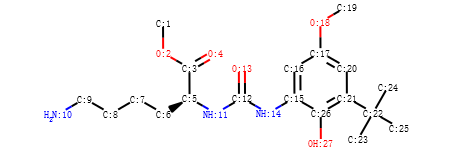

In [2]:
import rdkit.Chem as Chem 

smi = 'COC(=O)[C@H](CCCCN)NC(=O)Nc1cc(OC)cc(C(C)(C)C)c1O'
mol = Chem.MolFromSmiles(smi)
[a.SetAtomMapNum(i+1) for i,a in enumerate(mol.GetAtoms())]
print(Chem.MolToSmiles(mol))
mol


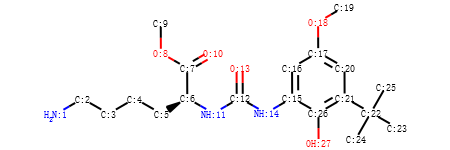

In [49]:
smi = '[NH2:1][CH2:2][CH2:3][CH2:4][CH2:5][C@@H:6]([C:7]([O:8][CH3:9])=[O:10])[NH:11][C:12](=[O:13])[NH:14][c:15]1[cH:16][c:17]([O:18][CH3:19])[cH:20][c:21]([C:22]([CH3:23])([CH3:24])[CH3:25])[c:26]1[OH:27]'
mol = Chem.MolFromSmiles(smi)
# [a.SetAtomMapNum(0) for a in mol.GetAtoms()]
# print(Chem.MolToSmiles(mol))
mol

O=C(OCc1ccccc1)[NH:1][CH2:2][CH2:3][CH2:4][CH2:5][C@@H:6]([C:7]([O:8][CH3:9])=[O:10])[NH:11][C:12](=[O:13])[NH:14][c:15]1[cH:16][c:17]([O:18][CH3:19])[cH:20][c:21]([C:22]([CH3:23])([CH3:24])[CH3:25])[c:26]1[OH:27]


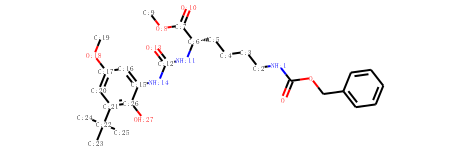

In [66]:
smi = 'O=C(OCc1ccccc1)[NH:1][CH2:2][CH2:3][CH2:4][CH2:5][C@@H:6]([C:7]([O:8][CH3:9])=[O:10])[NH:11][C:12](=[O:13])[NH:14][c:15]1[cH:16][c:17]([O:18][CH3:19])[cH:20][c:21]([C:22]([CH3:23])([CH3:24])[CH3:25])[c:26]1[OH:27]'
mol = Chem.MolFromSmiles(smi)
print(Chem.MolToSmiles(mol))
mol

COc1ccc(C[n:1]2[n:2][n:3][c:4]([C:5]([O:6][CH2:7][CH3:8])=[O:9])[c:10]2[C:11](=[O:12])[c:13]2[cH:14][cH:15][c:16]([O:17][CH3:18])[c:19]([O:20][CH3:21])[cH:22]2)cc1


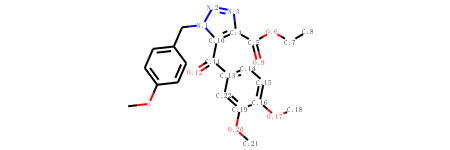

In [3]:
smi = 'COc1ccc(C[n:1]2[n:2][n:3][c:4]([C:5]([O:6][CH2:7][CH3:8])=[O:9])[c:10]2[C:11](=[O:12])[c:13]2[cH:14][cH:15][c:16]([O:17][CH3:18])[c:19]([O:20][CH3:21])[cH:22]2)cc1'
mol = Chem.MolFromSmiles(smi)
print(Chem.MolToSmiles(mol))
mol